In [1]:
import numpy as np                                                # Librería para manejo de arreglos numéricos.
import matplotlib.pyplot as plt                                   # Librería para manejo de gráficas.
import matplotlib.lines as lines
import pandas as pd                                               # Librería para manejo de archivos, permite cargar y guardar datasets desde CSV.
from scipy.ndimage.filters import gaussian_filter1d               # Librería científica de python, de aquí importamos el smooth.
from scipy.signal import find_peaks                               # Librería que permite encontrar los máximos y mínimos por medio de find_peaks
import csv       
import os


path=os.getcwd()

nombre_proyecto="AnalisisPatch"
ruta= path[:int(path.find(nombre_proyecto)+len(nombre_proyecto)+1)]+"\\Datasets\\20210616\\AAOGw10"

print(ruta)
print(os.listdir(ruta))

A:\Documentos\AnalisisPatch\\Datasets\20210616\AAOGw10
['a-I.csv', 'a-V.csv', 'AAOGw10.txt', 'b-I.csv', 'b-V.csv', 'c-I.csv', 'c-V.csv', 'd-I.csv', 'd-V.csv', 'e-I.csv', 'e-V.csv']


## Declaración de las rutas de archivos a utilizar

* Si alguna ruta no se va a utilizar, se puede comentar colocando un **#** al inicio de la línea.

In [2]:
path=os.getcwd()
nombre_proyecto="AnalisisPatch"
ruta= path[:int(path.find(nombre_proyecto)+len(nombre_proyecto)+1)]+"\\Datasets\\20210616\\AAOGw10"

In [3]:
iv_current_path = ruta+"\\a-I.csv"
iv_voltage_path = ruta+"\\a-V.csv"

## Carga de datasets

Se cargan los archivos con la rutas antes declaradas para hacer la curva IV.

In [4]:
voltage_dataframe = pd.read_csv(iv_voltage_path, sep = ',', skiprows = 5, header= None)
voltage_data=voltage_dataframe.values
Vpoint,Vevents=voltage_data.shape


current_dataframe = pd.read_csv(iv_voltage_path, sep = ',', skiprows = 5, header = None) 
current_data=current_dataframe.values
Cpoints,Cevents=current_data.shape

header = []                                                                     # Arreglo que manejará los datos de header.

with open(iv_current_path, newline='') as File:                                 # Ciclo que leerá las primeras 2 líneas del header del CSV, las cuáles contienen los datos de la resolución (points/ms) y los puntos por evento (Output points).
  reader = csv.reader(File)
  count = 0

  for row in reader:
    header.append(str(row))
    count = count+1
    if count >1: break

splited_header = []
for line in header:
  splited_header.append(str(line.split()))   

aux_resolution = splited_header[0]
aux_points = splited_header[1]
points = int(aux_points[37:42])                                                 # En esta línea obtenemos los output points



## Declaración de variables para el manejo de la escala de tiempo.

#Max_points = points                                 # Utilizará el total de puntos por evento.
Max_points = 22000                                   # Nos permitirá manejar el máximo de puntos a graficar, por si no queremos usar el total de puntos.
resolution = int(aux_resolution[34:36])              # resolution ➝ points/ms  se obtiene en la primer fila del CSV. Con esta configuración, el eje x estará en segundos.
time = np.arange(1,Max_points+1)/resolution          # Arreglo de tiempo para el eje x.

print(" Estos archivos cuenton un total de {} eventos de Voltaje y Corriente. \n Cada evento contiene un total de {} puntos registrados a una tasa de {} puntos por milisegundo. \n Además, cada evento tiene una duración de {} segundos".format(Vevents, points, resolution, (Vpoint/resolution)/1000))


 Estos archivos cuenton un total de 21 eventos de Voltaje y Corriente. 
 Cada evento contiene un total de 75000 puntos registrados a una tasa de 15 puntos por milisegundo. 
 Además, cada evento tiene una duración de 5.0 segundos


# Detencción de spikes
* Se detectan los eventos de voltaje que poseen spikes

In [5]:
plot_index = np.arange(0, Vevents, 1)                                        # Crea un arreglo con números de eventos de 0 a Vevents con pasos de 1. Grafica todos los eventos si el renglón de abajo está comentado.3

spike_detected_times = []
for event in plot_index:
  spike_train_lower_lim = 50*resolution              # Límite inferior del intervalo de tiempo en el que se encuentra el spike.
  spike_train_upper_lim = 1050*resolution            # Límite superior del intervalo de tiempo en el que se encuentra el spike.

  spike_train_duration = time[spike_train_lower_lim:spike_train_upper_lim]                                          # Arreglo de tiempo para mostrar el spike.

  curve_smoothed = gaussian_filter1d(voltage_data[spike_train_lower_lim:spike_train_upper_lim, event], sigma = 2)   # Arreglo de voltaje para mostrar el spike.

  diff_voltage = np.diff(curve_smoothed)                                          # Derivada del spike.
  
  #Contador de spikes
  spikes_index = np.where(diff_voltage > 2)[0]
  if len(spikes_index) == 0:
    spikes_detected = []
  else:
    spikes_detected = [time[spikes_index[0]]+50]
    for i in range(0, len(spikes_index)-1):
      spikes_detected.append(spikes_index[i])
      aux = spikes_detected.pop()
      if spikes_index[i+1]-aux == 1:
        pass
      elif spikes_index[i+1]-aux > 1:
        spikes_detected.append(time[spikes_index[i+1]]+50)
  
  spike_detected_times.append(spikes_detected)

for i in range(len(plot_index)):
  #print("En el evento {} se detectaron {} spikes".format(plot_index[i],len(spike_detected_times[i])))

    print("el evento {} se detectarons {} spike".format(plot_index[i],len(spike_detected_times[i])))  
#print(spike_detected_times)

el evento 0 se detectarons 0 spike
el evento 1 se detectarons 0 spike
el evento 2 se detectarons 0 spike
el evento 3 se detectarons 0 spike
el evento 4 se detectarons 0 spike
el evento 5 se detectarons 0 spike
el evento 6 se detectarons 0 spike
el evento 7 se detectarons 0 spike
el evento 8 se detectarons 0 spike
el evento 9 se detectarons 1 spike
el evento 10 se detectarons 0 spike
el evento 11 se detectarons 3 spike
el evento 12 se detectarons 0 spike
el evento 13 se detectarons 4 spike
el evento 14 se detectarons 0 spike
el evento 15 se detectarons 5 spike
el evento 16 se detectarons 0 spike
el evento 17 se detectarons 6 spike
el evento 18 se detectarons 0 spike
el evento 19 se detectarons 7 spike
el evento 20 se detectarons 0 spike


## Máximos y Mínimos
* En este bloque se seleccionan los eventos a los cuales se detectaron spikes y se obtienen los máximos y mínimos de cada uno de ellos

* Nota: El argumento distance en finde_peaks varia de acuerdo al número de evento que se está analizando, dependiendo del valor dado será la cantidad de puntos mostrados en la gráfica. La función find_peaks encuentra tanto coordenada en x como en y

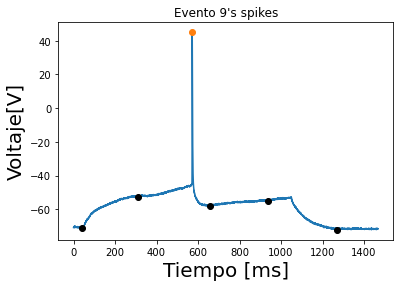

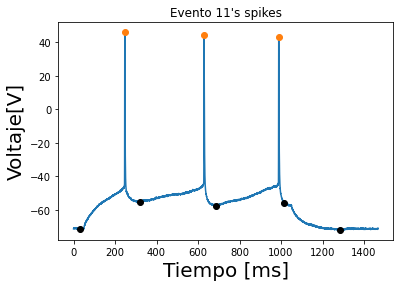

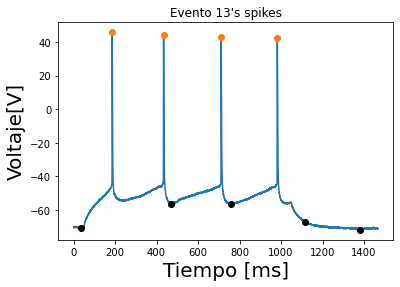

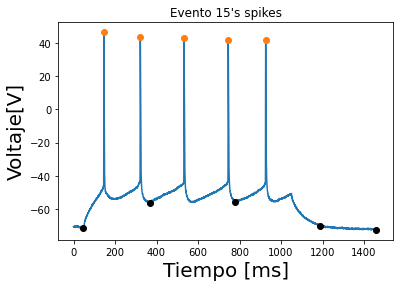

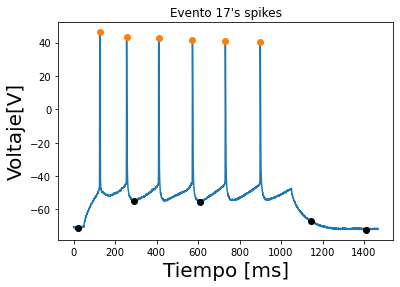

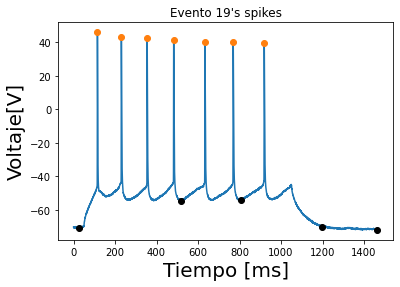

In [7]:
for i in plot_index:    
    if len(spike_detected_times[i]) != 0:
        voltaje_picos= gaussian_filter1d(voltage_data[0:Max_points,i],sigma=2)
        maximos=find_peaks(voltaje_picos,height=20,distance=1500)
        minimos=find_peaks(voltaje_picos*-1,height=20,distance=4000)
        plt.figure()
        plt.title("Evento " + str(i) + "'s spikes")
        plt.xlabel('Tiempo [ms]', size = 20)
        plt.ylabel('Voltaje[V]', size = 20)
        plt.plot(time,voltaje_picos)
        plt.plot(time[maximos[0]],voltaje_picos[maximos[0]],'o')
        plt.plot(time[minimos[0]],voltaje_picos[minimos[0]],'o',color='black')
        
        
       

## Evento 9
**El evento 9 sólo consta de un spike por lo que para el diagrama de fase se escogen los dos puntos mínimos más cercanos al spike para no tomar en cuenta la parte restante del evento**

**Ya con el spike aislado se deriva su voltaje de tal forma que se obtenga el diagrama de fase**

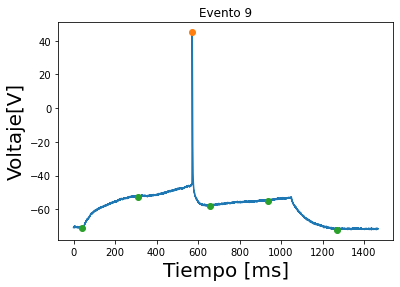

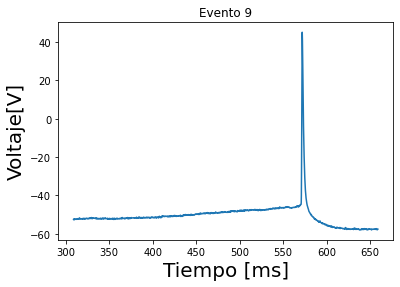

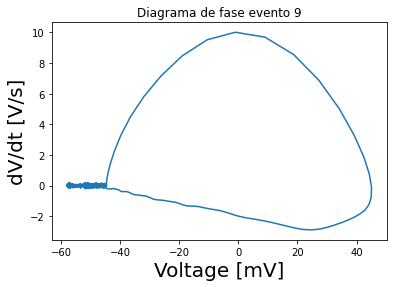

In [95]:
event=9

voltaje_9=gaussian_filter1d(voltage_data[0:Max_points,event],sigma=2)          #Arreglo de voltaje para el evento 9
maximo9=find_peaks(voltaje_9,height=20,distance=1500)                          #Localización de los máximos del evento
minimo9=find_peaks(voltaje_9*-1,height=20,distance=4000)                       #Localización de los mínimos del evento

plt.figure()
plt.title("Evento 9")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(time,voltaje_9)
plt.plot(time[maximo9[0]],voltaje_9[maximo9[0]],'o')
plt.plot(time[minimo9[0]],voltaje_9[minimo9[0]],'o')


tiempo_inf9=309*resolution                                                      #Tiempo límite inferior 
tiempo_sup9=659*resolution                                                      #Tiempo límite superior
intervalo_9=time[tiempo_inf9:tiempo_sup9]                                       #Intervalo para sólo mostrar el spike
voltaje_fase=gaussian_filter1d(voltage_data[tiempo_inf9:tiempo_sup9,event],sigma=2)
derivada9=np.diff(voltaje_fase)                                                 #Derivada del evento

plt.figure()
plt.title("Evento 9")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(intervalo_9,voltaje_fase)

plt.figure()
plt.title("Diagrama de fase evento 9")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
plt.plot(voltaje_fase[0:len(derivada9)],derivada9)

# Conteo de puntos por evento
* En las siguiente celda se contaron los puntos que había entre un mínimo y un máximo. 
* Primero se ubicaron los máximos y mínimos correspondientes a cada evento.
* Como se observa en las gráficas cada máximo(spike) se encuentra entre dos puntos mínimos. Entonces apartir de cada máximo se contó la cantidad de puntos hacia atras y hacia adelante, deteniendo el conteo en los mínimos abyacentes correspondientes. 
* Cada spike tendrá diferente cantidad de puntos, y de entre ellas se escoge la menor cantidad hacia adelante y hacia atrás por evento. Estas dos cantidades se restaran a cada spike con la finalidad de que los spikes de cada evento tenga la misma cantidad de puntos. 



## Conteo de puntos Evento 11

Puntos adelante [1075, 893, 1655]
Puntos atrás [3250, 4653, 4506]


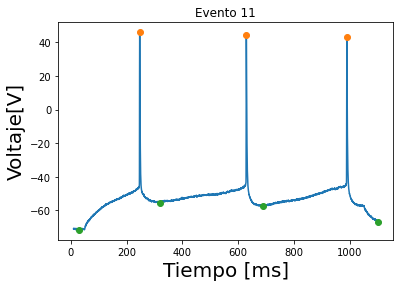

In [7]:
event=11                         # Se selecciona el evento

puntos_adelante11=[]             # Lista en la que se almacenará la cantidad puntos hacia delante de un máximo 
puntos_atras11=[]                #Lista en la que se almacenará la cantidad de puntos hacia atrás de un maximo


tiempo_inf11=10*resolution        #Límite inferior de tiempo 
tiempo_sup11=1100*resolution      #Límite superior de tiempo

intervalo_11=time[tiempo_inf11:tiempo_sup11]         #Arreglo de tiempo en el que se muestran los spikes solamente
voltaje_11=gaussian_filter1d(voltage_data[tiempo_inf11:tiempo_sup11,event],sigma=2)  #Arreglo de voltaje

maximo11=find_peaks(voltaje_11,height=20,distance=1500)         #Localización de los máxmos del evento
minimo11=find_peaks(voltaje_11*-1,height=20,distance=4000)      #Localización de los mínimos del evento

plt.title("Evento 11")                                           #Gráfica del evento señalando los máximos y mínimos que posee
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(intervalo_11,voltaje_11)
plt.plot(intervalo_11[maximo11[0]],voltaje_11[maximo11[0]],'o')
plt.plot(intervalo_11[minimo11[0]],voltaje_11[minimo11[0]],'o')

tiempo_maximo11=np.multiply(maximo11[0],1/15)                      #Tiempo real sobre la gráfica, se ocupa para poder realizar el conteo de puntos
tiempo_minimo11=np.multiply(minimo11[0],1/15)                      #Estos tiempos se usan para poder contar por intervalos.

#Puntos hacia atrás
for x,y in zip(tiempo_minimo11,tiempo_maximo11):      #El conteo empieza desde el primer mínimo que encuentra, recorre todos los puntos hasta que encuentra el primer máximo             
    tiempo_x=x*resolution                             #Después se salta al siguiente mínimo y repite la operación
    tiempo_y=y*resolution
    intervalo_xy=time[int(tiempo_x):int(tiempo_y)]
    conteo_atras11=gaussian_filter1d(voltage_data[int(tiempo_x):int(tiempo_y),event],sigma=2)
    puntos_atras11.append(len(conteo_atras11))        #Se añaden los puntos contados hacia atras en una lista.La cantidad de puntos de cada spike correspondera a un elemento de la lista
    

tiempo_minnuevo11=np.delete(tiempo_minimo11,0)        #Para hacer el conteo de puntos hacia delante se quita el primer elemento de la variable tiempo_minimo11, de tal forma que el primer mínimo no se tome en cuenta

#Puntos hacia delante
for w,z in zip(tiempo_maximo11,tiempo_minnuevo11):    # El conteo empieza desde el primer máximo del evento y recorre todos los puntos hasta que se detiene con un mínimo
    tiempo_w=w*resolution                             #Después salta al siguiente máximo y repite la operación
    tiempo_z=z*resolution
    intervalo_wz=time[int(tiempo_w):int(tiempo_z)]    
    conteo_adelante11=gaussian_filter1d(voltage_data[int(tiempo_w):int(tiempo_z),event],sigma=2)
    puntos_adelante11.append(len(conteo_adelante11))       #Se añaden los puntos contados hacia adelante en una lista.La cantidad de puntos de cada spike corresponderá a un elemento en lista
                                                            #Dependiendo de la cantidad de spikes se tendrán más o menos elementos almacenados en cada lista
        
menor_atras11=np.min(puntos_atras11)                       #Se escoge el elemento de la lista con menor cantidad de puntos hacia atras
menor_adelante11=np.min(puntos_adelante11)                 #Se escoge el elemento de la lista con menor cantidad de puntos hacia adelante

print('Puntos adelante',puntos_adelante11)
print('Puntos atrás',puntos_atras11)



## Diagrama de Fase evento 11

* En la primera parte de esta celda se usa la menor cantidad de puntos hacia delante y hacia atras para restarselos a cada uno de los spikes con la finalidad de que tengan aproximadante el mismo tamaño.
* Una vez que cada spike tiene la misma cantidad de puntos se deriva para obtener el diagrama de fase

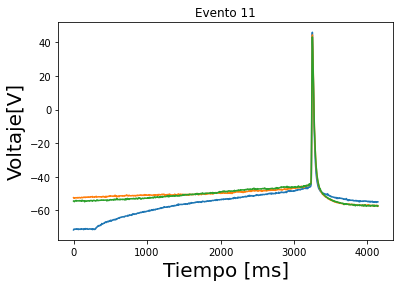

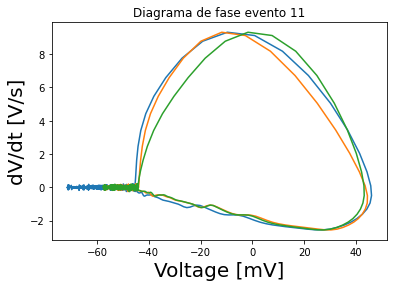

In [8]:
indices_x11=np.arange(len(voltaje_11))            #Arreglo en el que se almacena la cantidad de puntos de voltaje

trazos_cortados11={}                              #Se crea un diccionario para guardar los spikes con los nuevos puntos

plt.title("Evento 11")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)

for n in range(3):                               
    n_spike11=n                                    #Representa la cantidad de spikes que tiene cada evento
    punto_maximo_x11=maximo11[0][n_spike11]         #Arreglo de puntos para cada spike
    punto_maximo_y11=maximo11[1]['peak_heights'][n_spike11]
    corte_x11=indices_x11[punto_maximo_x11-menor_atras11:punto_maximo_x11+menor_adelante11]    #Resta de puntos para formar el nuevo spike
    plt.plot(voltaje_11[corte_x11])
    trazos_cortados11[n]=voltaje_11[corte_x11]         #Se agregan a una variable los nuevos spikes para dervivarlos 

plt.figure()
plt.title("Diagrama de fase evento 11")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
for trazo11 in trazos_cortados11.values():
    derivada11=np.diff(voltaje_11[corte_x11])       #dervida de cada spike
    plt.plot(trazo11[0:len(derivada11)],derivada11) 


**El procedimiento se repite para los demás eventos.**

# Conteo de puntos evento 13


Puntos atras [2275, 2787, 3613, 3379]
puntos adelante [926, 550, 677, 2817]


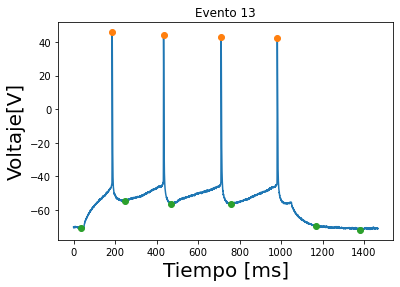

In [9]:
event=13
puntos_adelante13=[] 
puntos_atras13=[] 

voltaje_13=gaussian_filter1d(voltage_data[0:Max_points,event],sigma=2) 
maximos13=find_peaks(voltaje_13,height=20,distance=1500)    
minimos13=find_peaks(voltaje_13*-1,height=20,distance=3100) 

plt.title("Evento 13")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(time,voltaje_13)
plt.plot(time[maximos13[0]],voltaje_13[maximos13[0]],'o')
plt.plot(time[minimos13[0]],voltaje_13[minimos13[0]],'o')
                                    

tiempo_maximo13=np.multiply(maximos13[0],1/15) 
tiempo_minimo13=np.multiply(minimos13[0],1/15) 

#Puntos hacia atrás
for x,y in zip(tiempo_minimo13,tiempo_maximo13):
    tiempo_x=x*resolution
    tiempo_y=y*resolution
    intervalo_xy=time[int(tiempo_x):int(tiempo_y)]
    conteo_atras13=gaussian_filter1d(voltage_data[int(tiempo_x):int(tiempo_y),event],sigma=2)
    puntos_atras13.append(len(conteo_atras13))

tiempo_minnuevo13=np.delete(tiempo_minimo13,0)
#Puntos hacia delante
for w,z in zip(tiempo_maximo13,tiempo_minnuevo13):
    tiempo_w=w*resolution
    tiempo_z=z*resolution
    intervalo_wz=time[int(tiempo_w) : int(tiempo_z)]
    conteo_adelante13=gaussian_filter1d(voltage_data[int(tiempo_w):int(tiempo_z),event],sigma=2)
    puntos_adelante13.append(len(conteo_adelante13))

menor_atras13=np.min(puntos_atras13)    
menor_adelante13=np.min(puntos_adelante13)
   
    
print('')
print('Puntos atras',puntos_atras13)
print('puntos adelante',puntos_adelante13)

## Diagrama de Fase evento 13

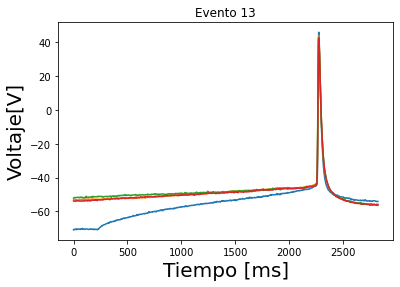

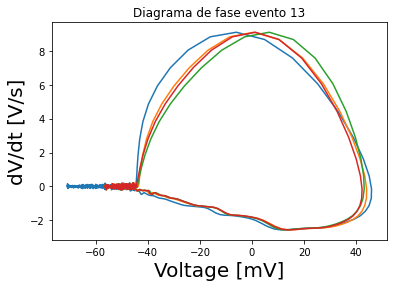

In [10]:
indices_x13=np.arange(len(voltaje_13))

trazos_cortados13={}
plt.title("Evento 13")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
for n in range(4):
    n_spike13=n
    punto_maximo_x13=maximos13[0][n_spike13]
    punto_maximo_y13=maximos13[1]['peak_heights'][n_spike13]
    corte_x13=indices_x13[punto_maximo_x13-menor_atras13:punto_maximo_x13+menor_adelante13]
    plt.plot(voltaje_13[corte_x13])
    trazos_cortados13[n]=voltaje_13[corte_x13]

plt.figure()
plt.title("Diagrama de fase evento 13")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
for trazo13 in trazos_cortados13.values():
    derivada13=np.diff(voltaje_13[corte_x13])
    plt.plot(trazo13[0:len(derivada13)],derivada13)


## Conteo de puntos evento 15

Puntos atras [1536, 1866, 2458, 2434, 2199]
Puntos adelante [765, 704, 759, 509, 708]


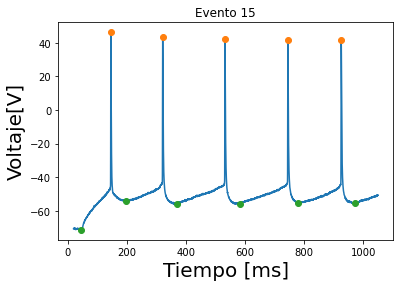

In [11]:
event=15

puntos_adelante15=[]
puntos_atras15=[]


tiempo_inf15= 20*resolution  #Intervalo de tiempo de inicio 
tiempo_sup15=1050*resolution # Intervalo de tiempo final 


intervalo_15=time[tiempo_inf15:tiempo_sup15] # Se define este intervalo de tiempo para tomar en cuenta únicamente los spikes del evento. 
voltaje_15=gaussian_filter1d(voltage_data[tiempo_inf15:tiempo_sup15,event],sigma=2)
maximos15=find_peaks(voltaje_15,height=20,distance=2000)
minimos15=find_peaks(voltaje_15*-1,height=20,distance=2000)


plt.title("Evento 15")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(intervalo_15,voltaje_15)
plt.plot(intervalo_15[maximos15[0]],voltaje_15[maximos15[0]],'o')
plt.plot(intervalo_15[minimos15[0]],voltaje_15[minimos15[0]],'o')


tiempo_maximo15=np.multiply(maximos15[0],1/15) 
tiempo_minimo15=np.multiply(minimos15[0],1/15)

#Conteo de puntos hacia atras
for x,y in zip(tiempo_minimo15,tiempo_maximo15):
    tiempo_x=x*resolution
    tiempo_y=y*resolution
    intervalo_xy=time[int(tiempo_x):int(tiempo_y)]
    conteo_atras15=gaussian_filter1d(voltage_data[int(tiempo_x):int(tiempo_y),event],sigma=2)
    puntos_atras15.append(len(conteo_atras15))

tiempo_minnuevo15=np.delete(tiempo_minimo15,0) #Elimina el primer elemento de la lista de tiempo para que el conteo se haga hacia adelante

#Conteo de puntos hacia  adelante
for w,z in zip(tiempo_maximo15,tiempo_minnuevo15):
    tiempo_w=w*resolution
    tiempo_z=z*resolution
    intervalo_wz=time[int(tiempo_w):int(tiempo_z)]
    conteo_adelante15=gaussian_filter1d(voltage_data[int(tiempo_w):int(tiempo_z),event],sigma=2)
    puntos_adelante15.append(len(conteo_adelante15))

#Almacena la cantidad menor de puntos de cada lista
menor_atras15=np.min(puntos_atras15)
menor_adelante15=np.min(puntos_adelante15)

print('Puntos atras',puntos_atras15)
print('Puntos adelante',puntos_adelante15)




## Diagrama de fase evento 15

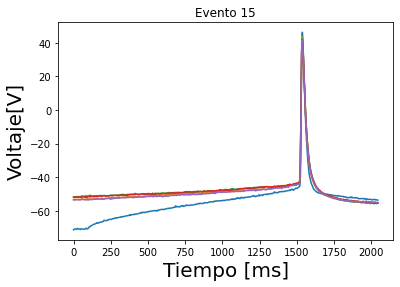

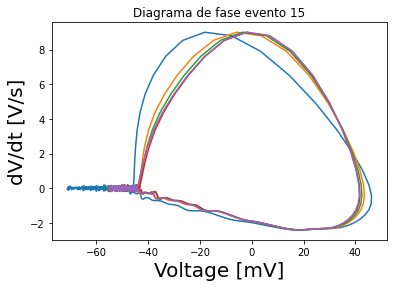

In [12]:
indices_x15=np.arange(len(voltaje_15))

trazos_cortados15={}
plt.title("Evento 15")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
for n in range(5):
    n_spike15=n
    punto_maximo_x15=maximos15[0][n_spike15]
    punto_maximo_y15=maximos15[1]['peak_heights'][n_spike15]
    corte_x15=indices_x15[punto_maximo_x15-menor_atras15:punto_maximo_x15+menor_adelante15]
    plt.plot(voltaje_15[corte_x15])
    trazos_cortados15[n]=voltaje_15[corte_x15]
    
plt.figure()
plt.title("Diagrama de fase evento 15")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
for trazo15 in trazos_cortados15.values():
    derivada15=np.diff(voltaje_15[corte_x15])
    plt.plot(trazo15[0:len(derivada15)],derivada15)


## Conteo de puntos evento 17

Puntos atras [1572, 1295, 1850, 2014, 1835, 1978]
Puntos adelante [647, 471, 425, 542, 544, 556]


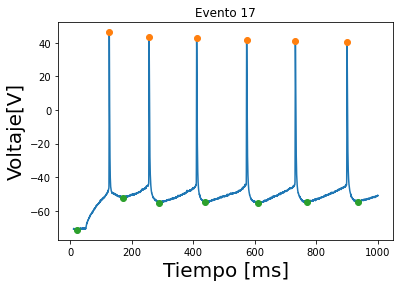

In [13]:
event=17


puntos_atras17=[]
puntos_adelante17=[]


tiempo_inf17=10*resolution
tiempo_sup17=1000*resolution
tiempo_17=time[tiempo_inf17:tiempo_sup17]
voltaje_17=gaussian_filter1d(voltage_data[tiempo_inf17:tiempo_sup17,event],sigma=2)

maximos17=find_peaks(voltaje_17,height=20,distance=1)
minimos17=find_peaks(voltaje_17*-1,height=20,distance=1500)

plt.title("Evento 17")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(tiempo_17,voltaje_17)
plt.plot(tiempo_17[maximos17[0]],voltaje_17[maximos17[0]],'o')
plt.plot(tiempo_17[minimos17[0]],voltaje_17[minimos17[0]],'o')

tiempo_maximo17=np.multiply(maximos17[0],1/15)
tiempo_minimo17=np.multiply(minimos17[0],1/15)

for x,y in zip(tiempo_minimo17,tiempo_maximo17):
    tiempo_x=x*resolution
    tiempo_y=y*resolution
    intevalo_xy=time[int(tiempo_x):int(tiempo_y)]
    conteo_atras17=gaussian_filter1d(voltage_data[int(tiempo_x):int(tiempo_y)],event)
    puntos_atras17.append(len(conteo_atras17))
    
tiempo_minnuevo17=np.delete(tiempo_minimo17,0)
for w,z in zip(tiempo_maximo17,tiempo_minnuevo17):
    tiempo_w=w*resolution
    tiempo_z=z*resolution
    intervalo_wz=time[int(tiempo_w):int(tiempo_z)]
    conteo_adelante17=gaussian_filter1d(voltage_data[int(tiempo_w):int(tiempo_z)],event)
    puntos_adelante17.append(len(conteo_adelante17))   

menor_atras17=np.min(puntos_atras17)
menor_adelante17=np.min(puntos_adelante17)

print('Puntos atras',puntos_atras17)
print('Puntos adelante',puntos_adelante17)   

## Diagrama de Fase evento 17

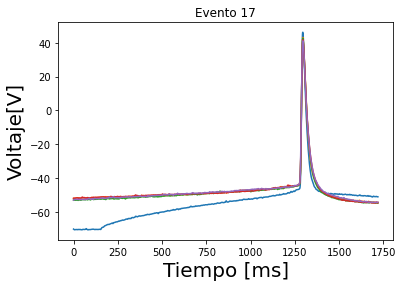

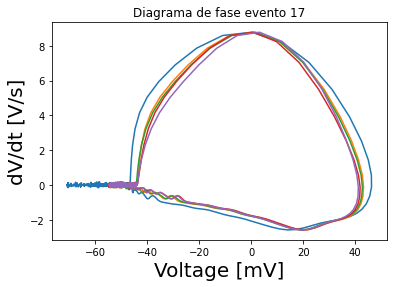

In [14]:
indices_x17=np.arange(len(voltaje_17))

trazos_cortados17={}
plt.title("Evento 17")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
for n in range(5):
    n_spike17=n
    punto_maximo_x17=maximos17[0][n_spike17]
    punto_maximo_y17=maximos17[1]['peak_heights'][n_spike17]
    corte_x17=indices_x17[punto_maximo_x17-menor_atras17:punto_maximo_x17+menor_adelante17]
    
    plt.plot(voltaje_17[corte_x17])
    trazos_cortados17[n]=voltaje_17[corte_x17]
    
plt.figure()
plt.title("Diagrama de fase evento 17")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
for trazo17 in trazos_cortados17.values():
    derivada17=np.diff(voltaje_17[corte_x17])
    plt.plot(trazo17[0:len(derivada17)],derivada17)


## Conteo de puntos Evento 19

Puntos atrás [1335, 1109, 1226, 1435, 1728, 1535, 1711]
Puntos adelante [621, 637, 483, 532, 508, 532, 557]


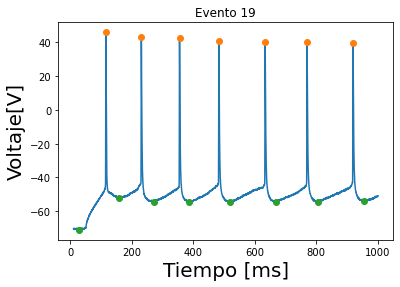

In [15]:
event=19

puntos_atras19=[]
puntos_adelante19=[]

tiempo_inf19=10*resolution
tiempo_sup19=1000*resolution

intervalo_19=time[tiempo_inf19:tiempo_sup19]
voltaje_19=gaussian_filter1d(voltage_data[tiempo_inf19:tiempo_sup19,event],sigma=2)

maximos19=find_peaks(voltaje_19,height=20,distance=1)
minimos19=find_peaks(voltaje_19*-1,height=20,distance=1500)


plt.title("Evento 19")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
plt.plot(intervalo_19,voltaje_19)
plt.plot(intervalo_19[maximos19[0]],voltaje_19[maximos19[0]],'o')
plt.plot(intervalo_19[minimos19[0]],voltaje_19[minimos19[0]],'o')


tiempo_maximo19=np.multiply(maximos19[0],1/15)
tiempo_minimo19=np.multiply(minimos19[0],1/15)

for x,y in zip(tiempo_minimo19,tiempo_maximo19):
    tiempo_x=x*resolution
    tiempo_y=y*resolution
    intevalo_xy=time[int(tiempo_x):int(tiempo_y)]
    conteo_atras19=gaussian_filter1d(voltage_data[int(tiempo_x):int(tiempo_y)],event)
    puntos_atras19.append(len(conteo_atras19))
    
tiempo_minnuevo19=np.delete(tiempo_minimo19,0)

for w,z in zip(tiempo_maximo19,tiempo_minnuevo19):
    tiempo_w=w*resolution
    tiempo_z=z*resolution
    intervalo_wz=time[int(tiempo_w):int(tiempo_z)]
    conteo_adelante19=gaussian_filter1d(voltage_data[int(tiempo_w):int(tiempo_z)],event)
    puntos_adelante19.append(len(conteo_adelante19))

menor_atras19=np.min(puntos_atras19)
menor_adelante19=np.min(puntos_adelante19)
    
print('Puntos atrás',puntos_atras19)
print('Puntos adelante',puntos_adelante19)



## Diagrama de fases evento 19

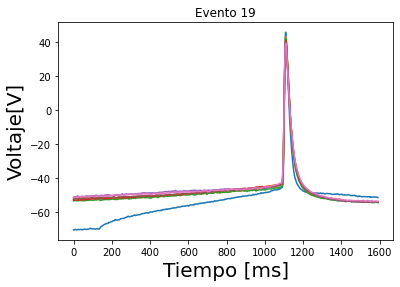

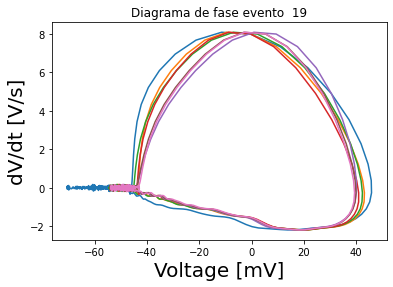

In [16]:
indices_x19=np.arange(len(voltaje_19))

trazos_cortados19={}
plt.title("Evento 19")
plt.xlabel('Tiempo [ms]', size = 20)
plt.ylabel('Voltaje[V]', size = 20)
for n in range(7):
    n_spike19=n
    punto_maximo_x19=maximos19[0][n_spike19]
    punto_maximo_y19=maximos19[1]['peak_heights'][n_spike19]
    corte_x19=indices_x19[punto_maximo_x19-menor_atras19:punto_maximo_x19+menor_adelante19]    
    plt.plot(voltaje_19[corte_x19])
    trazos_cortados19[n]=voltaje_19[corte_x19]
    
plt.figure()
plt.title("Diagrama de fase evento  19")
plt.xlabel('Voltage [mV]', size = 20)
plt.ylabel('dV/dt [V/s]', size = 20)
for trazo19 in trazos_cortados19.values():
    derivada19=np.diff(voltaje_19[corte_x19])
    plt.plot(trazo19[0:len(derivada19)],derivada19)
